# Lab 9

# Introducing Scikit-Learn

In this lab, you'll be working a few exercises on the material in Chapter 5 to get an introduction to the machine learning library for Python, `scikit_learn`.


---

# Exercises

In this section, you will be provided a few exercises to demonstrate your understanding of the chapter contents. Each exercise will have a Markdown section describing the problem, and you will provide cells below the description with code, comments and visual demonstrations of your solution.

### Problem 1

- Load the `'titanic'` dataset from `seaborn`
- Add a `'quantile'` column to the DataFrame that calculates which bin (of 20) that each passenger's fare amount belongs to among the fares for all passengers. Each bin has roughly the same number of passengers in it.

```python
titanic['quantile'] = list(pd.qcut(titanic.fare, 20).apply(lambda v:v.mid))
```

- Create a variable, `survival_by_quantile` equal to the mean survival rate of passengers in each quantile (hint: groupby)
- Create two variables, `x` and `y`, equal to the values of the index and series values of `survival_by_quantile`, respectively
- Transform `x` and `y` into the forms expected by Scikit-learn's Estimator API
- Use the linear regression model from [Section 5.02](https://nbviewer.jupyter.org/urls/bitbucket.org/dogwynn/pythondatasciencehandbook/raw/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#Supervised-learning-example:-Simple-linear-regression) to find a linear model for `x` and `y`
- Using the original `x` values, calculate the y values predicted by your linear model (save as `y_predicted`)
- Plot the following
    - Original `x` and `y` as a point plot in blue
    - `x` and `y_predicted` as a point plot in red
    - `x` and `y_predicted` as a line plot in blue

Based on your plot, would you say that a linear model is satisfactory for predicting the relationship between fare and survival rates?

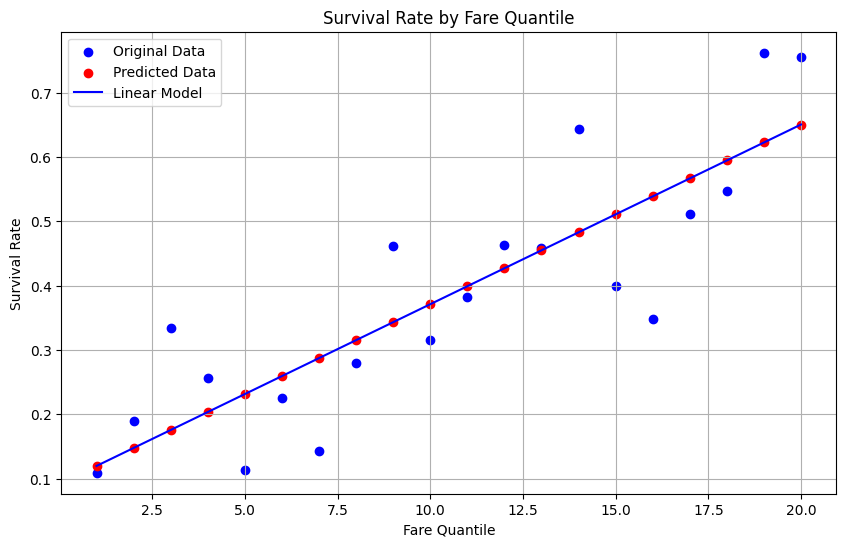

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Load the Titanic dataset
titanic = sns.load_dataset('titanic').dropna(subset=['fare', 'survived'])

# Step 2: Add a 'quantile' column dividing the fares into 20 bins with roughly equal passengers
titanic['quantile'] = pd.qcut(titanic['fare'], 20, labels=False) + 1

# Step 3: Calculate the mean survival rate for each quantile
survival_by_quantile = titanic.groupby('quantile')['survived'].mean()

# Step 4: Create x and y variables
x = np.array(survival_by_quantile.index).reshape(-1, 1)  # Reshape x to be 2D for Scikit-learn
y = np.array(survival_by_quantile.values)  # y should be 1D

# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Step 6: Predict y values using the model
y_predicted = model.predict(x)

# Step 7: Plot the original x, y and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Original Data')  # Original points
plt.scatter(x, y_predicted, color='red', label='Predicted Data')  # Predicted points
plt.plot(x, y_predicted, color='blue', label='Linear Model')  # Linear fit line

plt.title('Survival Rate by Fare Quantile')
plt.xlabel('Fare Quantile')
plt.ylabel('Survival Rate')
plt.legend()
plt.grid(True)
plt.show()




---

### Problem 2



- Use `sklearn.datasets.load_breast_cancer()` function to load that data into a variable `cancer`
- Use the `Isomap` manifold learning dimensionality reduction method (`components=2`) to visualize the data in a 2D scatter plot
- Use the `PCA` dimensionality reduction method (`components=2`) to visualize the data in a 2D scatter plot
- Use Gaussian naive Bayes to model the data (making sure to split the data into training and test data/target sets)
- Perform 5-fold cross validation on your Gaussian naive Bayes model


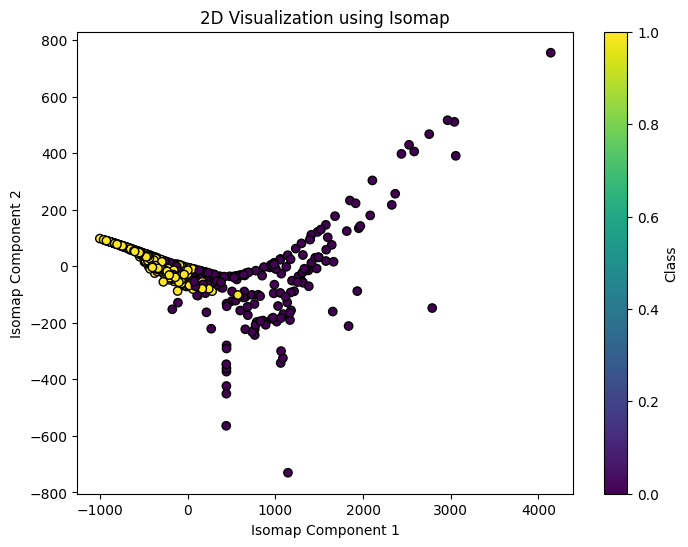

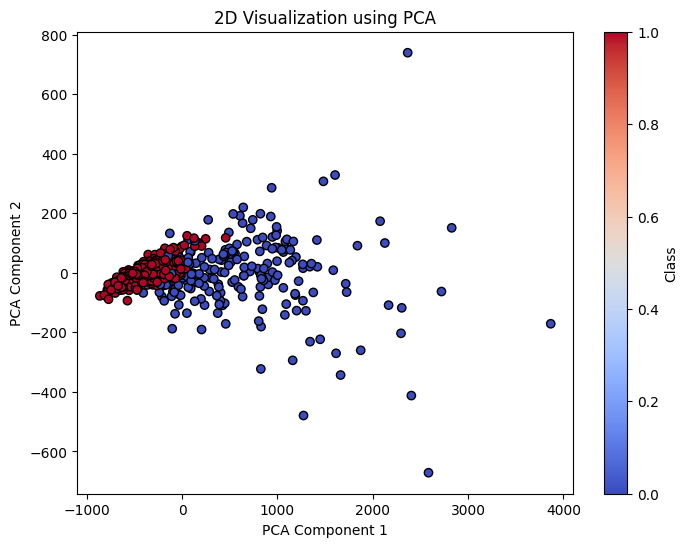

5-fold Cross-Validation Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Cross-Validation Score: 0.9385


In [5]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the breast cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Step 2: Dimensionality reduction using Isomap (components = 2)
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Step 3: Visualize the data with Isomap
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("2D Visualization using Isomap")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.colorbar(label='Class')
plt.show()

# Step 4: Dimensionality reduction using PCA (components = 2)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 5: Visualize the data with PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.title("2D Visualization using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class')
plt.show()

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 7: Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 8: Perform 5-fold cross-validation on the Gaussian Naive Bayes model
cv_scores = cross_val_score(gnb, X, y, cv=5)

# Display cross-validation scores
print(f"5-fold Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores):.4f}")
